### scqubits website: https://scqubits.readthedocs.io/en/latest/

Peter Groszkowski and Jens Koch,
scqubits: a Python package for superconducting qubits,
Quantum 5, 583 (2021).
https://quantum-journal.org/papers/q-2021-11-17-583/

# Overview
The package provides convenient ways 
- to obtain energy spectra of common superconducting qubits, 
- to plot their energy levels as a function of external parameters, 
- to calculate matrix elements and predict coherence times etc. 

scqubits further offers an interface to QuTiP, making it easy to work with composite Hilbert spaces consisting of multiple coupled superconducting qubits and harmonic modes.

In [3]:
import scqubits as scq
import numpy as np

# GUI for beginners

In [4]:
scq.GUI()

Container(children=[Sheet(children=[Card(children=[Img(layout=None, src='data:image/png;base64,iVBORw0KGgoAAAA…

# Basics with Transmon qubit

The transmon qubit is described by the Hamiltonian
\begin{equation}
H=4E_\text{C}(\hat{n}-n_g)^2-\frac{1}{2}E_\text{J}\sum_n(|n\rangle\langle n+1|+\text{h.c.}),
\end{equation}
expressed in terms of the charge operator $\hat{n}$ and its eigenstates $|n\rangle$; $E_C$ is the charging energy, $E_J$ the Josephson energy, and $n_g$ the offset charge. 

<br>

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [5]:
tmon = scq.Transmon.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

**Programmatic creation**

In [6]:
scq.Transmon?

Init signature:
scq.Transmon(
    EJ: float,
    EC: float,
    ng: float,
    ncut: int,
    truncated_dim: int = 6,
    id_str: Optional[str] = None,
    evals_method: Union[Callable, str, NoneType] = None,
    evals_method_options: Optional[dict] = None,
    esys_method: Union[Callable, str, NoneType] = None,
    esys_method_options: Optional[dict] = None,
) -> None
Docstring:     
Class for the Cooper-pair-box and transmon qubit. The Hamiltonian is
represented in dense form in the number basis,
:math:`H_\text{CPB}=4E_\text{C}(\hat{n}-n_g)^2-\frac{E_\text{J}}{2}(
|n\rangle\langle n+1|+\text{h.c.})`.
Initialize with, for example::

    Transmon(EJ=1.0, EC=2.0, ng=0.2, ncut=30)

Parameters
----------
EJ:
   Josephson energy
EC:
    charging energy
ng:
    offset charge
ncut:
    charge basis cutoff, `n = -ncut, ..., ncut`
truncated_dim:
    desired dimension of the truncated quantum system; expected: truncated_dim > 1
id_str:
    optional string by which this instance can be referred 

In [7]:
tmon2 = scq.Transmon(
    EJ=30.02,
    EC=1.2,
    ng=0.0,
    ncut=31
)

**Displaying and modifying parameters**

In [8]:
print(tmon)

Transmon------------| [Transmon_3]
                    | EJ: 15.0
                    | EC: 0.3
                    | ng: 0.0
                    | ncut: 30
                    | truncated_dim: 10
                    |
                    | dim: 61



In [9]:
tmon.EJ = 16.5

print(tmon)

Transmon------------| [Transmon_3]
                    | EJ: 16.5
                    | EC: 0.3
                    | ng: 0.0
                    | ncut: 30
                    | truncated_dim: 10
                    |
                    | dim: 61



Modifying values in the above GUI works as well.

## Computing and plotting eigenenergies and wavefunctions

**Eigenenergies.** The energy eigenvalues for the transmon are obtained by calling the `eigenvals()` method. The optional parameter `evals_count` specifies the sought number of eigenenergies.

In [10]:
tmon.eigenvals(evals_count=12)

array([-13.43050468,  -7.45413508,  -1.8196649 ,   3.4343701 ,
         8.21898368,  12.65149873,  15.39327331,  21.01873865,
        21.28500237,  31.17602842,  31.17939631,  44.00315414])

**Eigenstates**. `eigensys` is used to obtain both eigenenergies and eigenstates (represented in charge basis).

In [11]:
evals, evecs = tmon.eigensys()

**Plot energy levels**. 
To plot eigenenergies vs. a qubit parameter (`EJ`, `EC`, or `ng`), we generate an array of values for the desired parameter and call the method `plot_evals_vs_paramvals`:

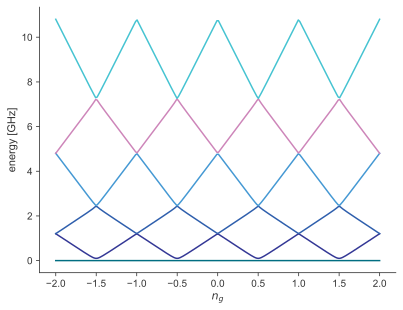

In [12]:
ng_list = np.linspace(-2, 2, 220)
tmon.EJ = 0.1  # temporarily reduce EJ to see some charge dispersion
fig, axes = tmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=6, subtract_ground=True)
tmon.EJ = 15  # switch back 

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$n_g$', ylabel='energy [GHz]'>)

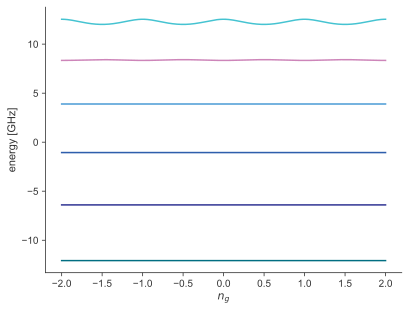

In [13]:
tmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=6, subtract_ground=False)

**Charge-basis wavefunction for eigenstate**

In [14]:
tmon.EJ = 0.1

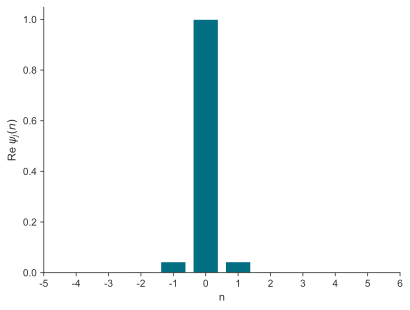

In [15]:
tmon.plot_n_wavefunction(esys=None, which=0, mode='real');

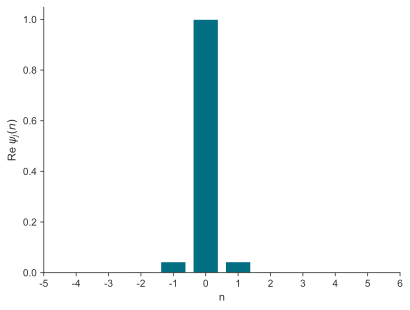

In [16]:
tmon.plot_n_wavefunction(esys=None, which=0, mode='real');

**Phase-basis wavefunction for eigenstate**

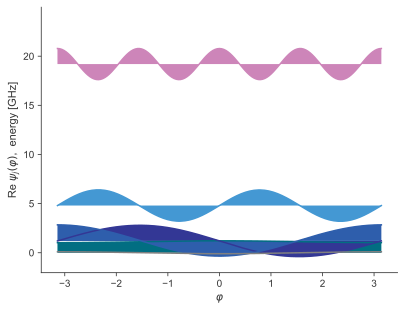

In [17]:
tmon.plot_phi_wavefunction(esys=None, which=(0,1,2,3,8), mode='real');

**Dispersion of transition energies**

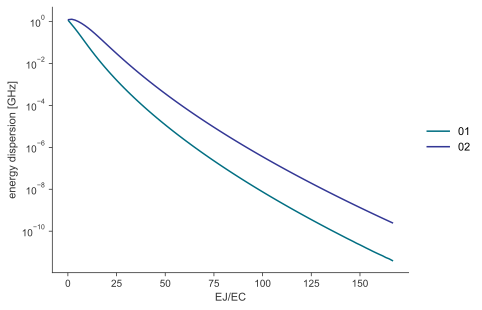

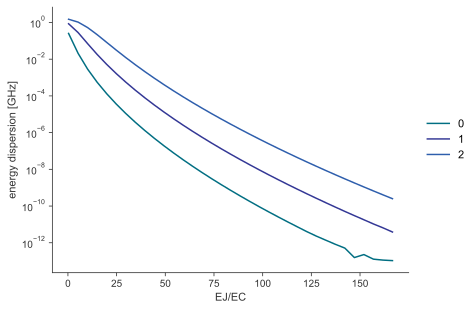

In [18]:
EJvals = np.linspace(0.1, 50, 100)
tmon.plot_dispersion_vs_paramvals('ng', 'EJ', EJvals, ref_param='EC', transitions=(((0,1), (0,2))));

EJvals = np.linspace(0.1, 50, 35)
tmon.plot_dispersion_vs_paramvals('ng', 'EJ', EJvals, ref_param='EC', levels=(0,1,2));


tmon.plot_dispersion_vs_paramvals('ng', 'EJ', EJvals, ref_param='EC', transitions=(((0,1), (0,2))));
## Calculating and visualizing matrix elements

**Compute matrix elements.** Matrix elements can be calculated by referring to the `Transmon` operator methods in string form. For instance, `.n_operator` yields the charge operator:

In [19]:
tmon.matrixelement_table('n_operator', evals_count=3)

array([[ 0.        , -0.05865784,  0.        ],
       [-0.05865784,  0.        , -0.99847136],
       [ 0.        , -0.99847136,  0.        ]])

**Plotting matrix elements**. Calling the `.plot_matrixelements` method yields:

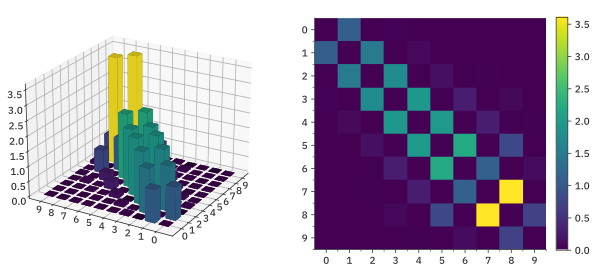

In [22]:
tmon.plot_matrixelements('n_operator', evals_count=10);

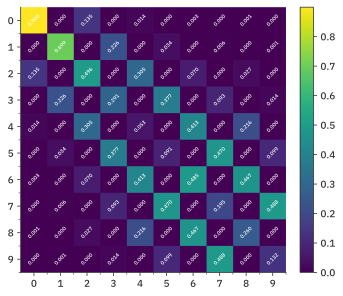

In [23]:
tmon.plot_matrixelements('cos_phi_operator', evals_count=10, show3d=False, show_numbers=True);

**Plot matrix elements vs. parameter value**

Spectral data:   0%|          | 0/220 [00:00<?, ?it/s]

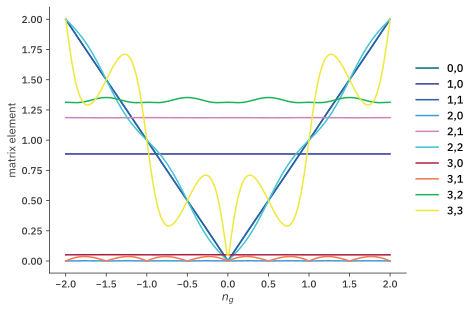

In [24]:
tmon.EJ = 7.0
fig, ax = tmon.plot_matelem_vs_paramvals('n_operator', 'ng', ng_list, select_elems=4);

# Tunable Transmon

Replacing the above transmon's Josephson junction by a SQUID loop makes the transmon tunable. The resulting Hamiltonian is 
\begin{equation}
H_\text{CPB}=4E_\text{C}(\hat{n}-n_g)^2-\frac{1}{2}E_\text{J,eff}(\Phi_\text{ext})\sum_n(|n\rangle\langle n+1|+\text{h.c.}),
\end{equation}
expressed in the charge basis. Here,  parameters are as above except for the effective Josephson energy $E_\text{J,eff}(\Phi_\text{ext}) = E_{\text{J,max}} \sqrt{\cos^2(\pi\Phi_\text{ext}/\Phi_0)+ d^2 \sin^2 (\pi\Phi_\text{ext}/\Phi_0)}$, where $E_\text{J,max} = E_\text{J1} + E_\text{J2}$ is the maximum Josephson energy, and $d=(E_\text{J1}-E_\text{J2})/(E_\text{J1}+E_\text{J2})$ is the relative junction asymmetry.

<br>

**Create instance.** An instance of a tunable transmon qubit is obtained like this:

In [25]:
tune_tmon = scq.TunableTransmon(
    EJmax=50.0,
    EC=0.5,
    d=0.01,
    flux=0.0,
    ng=0.0,
    ncut=30
)

**Create via GUI**

In [15]:
tune_tmon = scq.TunableTransmon.create()

Output()

Spectral data:   0%|          | 0/220 [00:00<?, ?it/s]

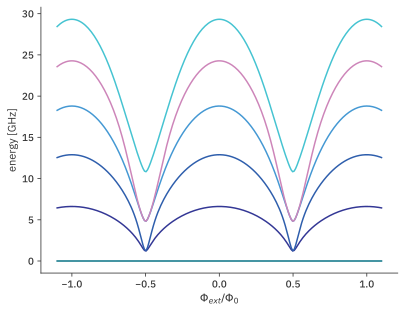

In [16]:
flux_list = np.linspace(-1.1, 1.1, 220)
tune_tmon.plot_evals_vs_paramvals('flux', flux_list, subtract_ground=True);

Certainly! Let's break down the embedding process step by step, using a three-qubit system where each qubit has 4 levels. This means that each qubit's Hamiltonian is a 4x4 matrix, and the overall system's Hamiltonian will be a $ 64 \times 64 $ matrix (since $ 4 \times 4 \times 4 = 64 $).

### 1. **Static Hamiltonian of the Entire System**

Assume each qubit's Hamiltonian is represented by a matrix $ H_q $ for qubit $ q $. The overall static Hamiltonian $ H_{\text{static}} $ is the sum of the individual Hamiltonians embedded in the full system's Hilbert space.

#### For Qubit 1:
If $ H_1 $ is the Hamiltonian for qubit 1, its contribution to the overall static Hamiltonian is embedded as:
$$
H_{\text{static},1} = H_1 \otimes I \otimes I
$$
where $ I $ is the identity matrix for the other qubits.

#### For Qubit 2:
If $ H_2 $ is the Hamiltonian for qubit 2, its contribution is:
$$
H_{\text{static},2} = I \otimes H_2 \otimes I
$$

#### For Qubit 3:
If $ H_3 $ is the Hamiltonian for qubit 3, its contribution is:
$$
H_{\text{static},3} = I \otimes I \otimes H_3
$$

The overall static Hamiltonian is the sum:
$$
H_{\text{static}} = H_{\text{static},1} + H_{\text{static},2} + H_{\text{static},3}
$$

### 2. **Drive Hamiltonians for Each Qubit**

Suppose we have drive Hamiltonians $ H_{\text{drive},1} $, $ H_{\text{drive},2} $, and $ H_{\text{drive},3} $ for qubits 1, 2, and 3, respectively. The goal is to embed these in the same way as the static Hamiltonians so that they only affect the intended qubit.

#### For Qubit 1:
The drive Hamiltonian for qubit 1 is embedded as:
$$
H_{\text{drive, embedded},1} = H_{\text{drive},1} \otimes I \otimes I
$$

#### For Qubit 2:
The drive Hamiltonian for qubit 2 is embedded as:
$$
H_{\text{drive, embedded},2} = I \otimes H_{\text{drive},2} \otimes I
$$

#### For Qubit 3:
The drive Hamiltonian for qubit 3 is embedded as:
$$
H_{\text{drive, embedded},3} = I \otimes I \otimes H_{\text{drive},3}
$$

### 3. **Example in Matrix Form**

Let's consider simple 2x2 identity matrices and Pauli matrices as stand-ins for the Hamiltonians to illustrate the embedding process.

#### Static Hamiltonian Example:

- Assume $ H_1 = \sigma_x $, $ H_2 = \sigma_y $, $ H_3 = \sigma_z $, where $ \sigma_x, \sigma_y, \sigma_z $ are Pauli matrices.
  
$$
\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad \sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad \sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

- For a system with each qubit having 2 levels (just for simplicity), the embedding for $ H_1 $ in a 3-qubit system (8x8 matrix) would be:

$$
H_{\text{static},1} = \sigma_x \otimes I \otimes I = \begin{pmatrix} 
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

Similarly, the embedded matrices for $ H_{\text{static},2} $ and $ H_{\text{static},3} $ would be:

$$
H_{\text{static},2} = I \otimes \sigma_y \otimes I = \begin{pmatrix} 
0 & -i & 0 & 0 & 0 & 0 & 0 & 0 \\
i & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -i & 0 & 0 & 0 & 0 \\
0 & 0 & i & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -i & 0 & 0 \\
0 & 0 & 0 & 0 & i & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -i \\
0 & 0 & 0 & 0 & 0 & 0 & i & 0 \\
\end{pmatrix}
$$

$$
H_{\text{static},3} = I \otimes I \otimes \sigma_z = \begin{pmatrix} 
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 \\
\end{pmatrix}
$$

### 4. **Embedding Drives**

Using the `embed_single_qubit_drive_list` method:

- Assume $ H_{\text{drive},1} = \sigma_x $ for Qubit 1.
- $ H_{\text{drive, embedded},1} $ would be the same as $ H_{\text{static},1} $ above.

For Qubit 2 and Qubit 3, you would similarly embed their respective drive Hamiltonians into the overall Hamiltonian.

### Summary

This process ensures that each qubit's Hamiltonian, whether static or drive-induced, only affects the correct qubit by embedding it within the tensor product with identity operators for the other qubits. The `embed_single_qubit_drive_list` method correctly embeds each qubit's drive Hamiltonians in the overall Hamiltonian so that they target the intended qubit, leaving the other qubits unaffected.

Great question! Let's break down how the `drive_hamiltonian_list` and `qt.tensor` operations work together to create the correct embedded Hamiltonians for each qubit.

### Step-by-Step Breakdown

#### 1. **Initialization of `drive_hamiltonian_list`**
```python
drive_hamiltonian_list = [qt.qeye(self.qubits[q].n) for q in self.qubits]
```
- This line creates a list of identity matrices (`qt.qeye(self.qubits[q].n)`) for all the qubits in the system.
- For example, if you have 3 qubits, each with 4 levels, `drive_hamiltonian_list` would initially look like:
  $$
  [I_4, I_4, I_4]
  $$
  where $ I_4 $ is the 4x4 identity matrix.

#### 2. **Replacement with the Drive Hamiltonian**
```python
drive_hamiltonian_list[qubit_id - 1] = drive_hamiltonians[t_idx]
```
- This line replaces the identity matrix at the index corresponding to `qubit_id - 1` with the drive Hamiltonian for the current qubit and time step.
- Suppose `qubit_id = 1`, then `drive_hamiltonian_list[0]` (the first element) would be replaced with `H_{\text{drive},1}`. After this operation, `drive_hamiltonian_list` might look like:
  $$
  [H_{\text{drive},1}, I_4, I_4]
  $$
- This ensures that the drive Hamiltonian for qubit 1 will affect only qubit 1 when we tensor the matrices together.

#### 3. **Tensor Product to Combine Hamiltonians**
```python
embedded_drive_hamiltonian = qt.tensor(drive_hamiltonian_list)
```
- The `qt.tensor` function takes the tensor product of the matrices in `drive_hamiltonian_list`. The tensor product naturally handles the ordering, ensuring that the correct identity matrices are on the left or right as needed.

### Example: Tensoring Three Qubits

Let's consider an explicit example with three qubits, each with 2 levels (to keep matrices manageable, but the logic extends to any number of levels).

Assume:
- $ H_{\text{drive},1} = \sigma_x $
- $ H_{\text{drive},2} = \sigma_y $
- $ H_{\text{drive},3} = \sigma_z $

The identity matrices are:
- $ I_2 = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $

**Embedding for Qubit 1**:
- `drive_hamiltonian_list` after replacement:
  $$
  [\sigma_x, I_2, I_2]
  $$
- Tensor product:
  $$
  H_{\text{drive, embedded},1} = \sigma_x \otimes I_2 \otimes I_2
  $$

**Embedding for Qubit 2**:
- `drive_hamiltonian_list` after replacement:
  $$
  [I_2, \sigma_y, I_2]
  $$
- Tensor product:
  $$
  H_{\text{drive, embedded},2} = I_2 \otimes \sigma_y \otimes I_2
  $$

**Embedding for Qubit 3**:
- `drive_hamiltonian_list` after replacement:
  $$
  [I_2, I_2, \sigma_z]
  $$
- Tensor product:
  $$
  H_{\text{drive, embedded},3} = I_2 \otimes I_2 \otimes \sigma_z
  $$

### How Tensoring Works

The tensor product operation in `qt.tensor` works by expanding the matrices in `drive_hamiltonian_list` in the correct order. When tensoring, each matrix is expanded across the entire Hilbert space:

For example:
$$
\sigma_x \otimes I_2 \otimes I_2 = \begin{pmatrix} 
\sigma_x & 0 & 0 & 0 \\
0 & \sigma_x & 0 & 0 \\
0 & 0 & \sigma_x & 0 \\
0 & 0 & 0 & \sigma_x 
\end{pmatrix}
$$

This matrix directly corresponds to the effect of $ \sigma_x $ only on the first qubit, while the second and third qubits are unaffected (because of the identity matrices).

### Generalization

This process generalizes to any number of qubits and levels:
- The position of the Hamiltonian in `drive_hamiltonian_list` determines which qubit it affects.
- The tensor product expands the operation over the entire Hilbert space, correctly positioning identity matrices on the left or right as needed to ensure only the intended qubit is affected.

In summary:
- **`drive_hamiltonian_list[qubit_id - 1] = drive_hamiltonians[t_idx]`**: Replaces the identity matrix with the drive Hamiltonian for the specific qubit.
- **`qt.tensor(drive_hamiltonian_list)`**: Computes the overall Hamiltonian, embedding the drive Hamiltonian for the correct qubit while leaving others unaffected by using identity matrices.

This mechanism handles any number of qubits and levels by naturally placing the identity matrices in the correct positions through the structure of the list and the tensor product operation.

To add coupling between two qubits, such as qubit 1 and qubit 2, the process involves creating a coupling Hamiltonian that acts on both qubits and then embedding this Hamiltonian into the full system Hamiltonian. This coupling term could represent, for example, an interaction such as $ H_{\text{coupling}} = J (\sigma_x^{(1)} \otimes \sigma_x^{(2)}) $, where $ J $ is the coupling strength.

### Step-by-Step Process for Coupling Two Qubits

#### 1. **Define the Coupling Hamiltonian**
The coupling Hamiltonian typically involves a term that acts on both qubits. For instance, a simple coupling could be:
$$
H_{\text{coupling}} = J \cdot (\sigma_x^{(1)} \otimes \sigma_x^{(2)})
$$
where $ J $ is the coupling strength, and $ \sigma_x $ is the Pauli-X matrix acting on the respective qubits.

#### 2. **Embedding the Coupling Hamiltonian**

In a three-qubit system (each with 2 levels for simplicity), the embedding of this coupling Hamiltonian needs to be done such that it only affects qubit 1 and qubit 2, while qubit 3 is unaffected.

The full Hamiltonian in matrix form for the coupling between qubit 1 and qubit 2, and identity on qubit 3, is given by:
$$
H_{\text{coupling, embedded}} = J \cdot (\sigma_x \otimes \sigma_x \otimes I)
$$

### Matrix Form for the Coupling Hamiltonian

Let's explicitly write down the matrices:

- **Pauli-X matrix**:
$$
\sigma_x = \begin{pmatrix} 
0 & 1 \\
1 & 0 
\end{pmatrix}
$$

- **Identity matrix for qubit 3**:
$$
I_2 = \begin{pmatrix} 
1 & 0 \\
0 & 1 
\end{pmatrix}
$$

The coupling Hamiltonian in matrix form:
$$
H_{\text{coupling, embedded}} = J \cdot \left( \begin{pmatrix} 
0 & 1 \\
1 & 0 
\end{pmatrix} \otimes \begin{pmatrix} 
0 & 1 \\
1 & 0 
\end{pmatrix} \otimes \begin{pmatrix} 
1 & 0 \\
0 & 1 
\end{pmatrix} \right)
$$

When expanded, this becomes:
$$
H_{\text{coupling, embedded}} = J \cdot \begin{pmatrix} 
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
\end{pmatrix}
$$

### Qutip Code for Embedding the Coupling

Here's how you would implement this in Qutip:

```python
import qutip as qt

# Define Pauli matrices
sigma_x = qt.sigmax()
I = qt.qeye(2)  # 2x2 identity matrix for qubit with 2 levels

# Coupling strength
J = 1.0

# Define the coupling Hamiltonian for qubits 1 and 2
H_coupling = J * qt.tensor(sigma_x, sigma_x, I)

# H_coupling is now a 8x8 matrix (since 2^3 = 8 for 3 qubits with 2 levels each)
print("Coupling Hamiltonian (H_coupling):")
print(H_coupling)
```

### Explanation:
1. **`qt.tensor(sigma_x, sigma_x, I)`**: This line creates the tensor product of the Pauli-X matrices for qubit 1 and qubit 2, and the identity matrix for qubit 3. This operation effectively embeds the interaction term between qubit 1 and qubit 2 in the overall system Hamiltonian, leaving qubit 3 unaffected.

2. **`H_coupling`**: The resulting matrix is the full system Hamiltonian that includes the coupling between qubit 1 and qubit 2. In this case, it’s an 8x8 matrix because we are dealing with three qubits, each with 2 levels.

### Generalization to More Qubits or Levels

- **More Qubits**: The tensor product approach generalizes naturally to systems with more qubits. Simply add more identity matrices to the tensor product.
  
- **More Levels**: If each qubit has more than 2 levels, replace the Pauli matrices with the appropriate operators (e.g., generalized Pauli operators) and adjust the identity matrices accordingly.

### Summary

The matrix and code above demonstrate how you can embed a coupling Hamiltonian that affects two specific qubits in a larger system. The tensor product operation in Qutip ensures that the Hamiltonian is correctly positioned to influence only the targeted qubits, with identity matrices preserving the state of the other qubits.

To add a coupling between qubit 1 and qubit 3, the process is similar to what we did for qubit 1 and qubit 2. The coupling Hamiltonian will involve terms that act on both qubit 1 and qubit 3, while qubit 2 will be unaffected and represented by an identity matrix.

### Step-by-Step Process for Coupling Qubit 1 and Qubit 3

#### 1. **Define the Coupling Hamiltonian**

For the coupling between qubit 1 and qubit 3, a typical form of the coupling Hamiltonian could be:
$$
H_{\text{coupling}} = J \cdot (\sigma_x^{(1)} \otimes I \otimes \sigma_x^{(3)})
$$
where:
- $ J $ is the coupling strength.
- $ \sigma_x $ is the Pauli-X matrix acting on the respective qubits.
- $ I $ is the identity matrix for qubit 2, indicating that qubit 2 is not affected by this interaction.

#### 2. **Embedding the Coupling Hamiltonian**

In a three-qubit system, the embedded coupling Hamiltonian that couples qubit 1 and qubit 3 while leaving qubit 2 unaffected is:
$$
H_{\text{coupling, embedded}} = J \cdot (\sigma_x \otimes I \otimes \sigma_x)
$$

### Matrix Form for the Coupling Hamiltonian

Let's explicitly write down the matrices:

- **Pauli-X matrix**:
$$
\sigma_x = \begin{pmatrix} 
0 & 1 \\
1 & 0 
\end{pmatrix}
$$

- **Identity matrix for qubit 2**:
$$
I_2 = \begin{pmatrix} 
1 & 0 \\
0 & 1 
\end{pmatrix}
$$

The coupling Hamiltonian in matrix form:
$$
H_{\text{coupling, embedded}} = J \cdot \left( \begin{pmatrix} 
0 & 1 \\
1 & 0 
\end{pmatrix} \otimes \begin{pmatrix} 
1 & 0 \\
0 & 1 
\end{pmatrix} \otimes \begin{pmatrix} 
0 & 1 \\
1 & 0 
\end{pmatrix} \right)
$$

When expanded, this becomes:
$$
H_{\text{coupling, embedded}} = J \cdot \begin{pmatrix} 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
$$

### Qutip Code for Embedding the Coupling

Here’s how you would implement this in Qutip:

```python
import qutip as qt

# Define Pauli-X matrix (sigma_x) for 2-level systems
sigma_x = qt.sigmax()
print(f"sigma_x: {sigma_x}")
# Identity matrix for 2 levels
I_2 = qt.qeye(2)
print(f"I_2: {I_2}")
# Coupling strength
J = 1.0

# Define the coupling Hamiltonian for qubits 1 and 2 (both 2-level systems)
H_coupling_12 = J * qt.tensor(sigma_x, sigma_x)
print(f"H_coupling_12: {H_coupling_12}")
# Show the resulting coupling Hamiltonian
H_coupling_12_matrix = H_coupling_12.full()  # Convert to dense matrix for better display

# Print the matrix
print("Coupling Hamiltonian (H_coupling_12):")
print(H_coupling_12_matrix)
```

### Explanation:
1. **`qt.tensor(sigma_x, I, sigma_x)`**: This line creates the tensor product of the Pauli-X matrix for qubit 1, the identity matrix for qubit 2, and the Pauli-X matrix for qubit 3. This operation embeds the interaction term between qubit 1 and qubit 3 in the overall system Hamiltonian, leaving qubit 2 unaffected.

2. **`H_coupling_13`**: The resulting matrix is the full system Hamiltonian that includes the coupling between qubit 1 and qubit 3. In this case, it’s an 8x8 matrix because we are dealing with three qubits, each with 2 levels.

### Generalization to More Qubits or Levels

- **More Qubits**: The tensor product approach generalizes naturally to systems with more qubits. Simply add more identity matrices to the tensor product for the qubits that are not part of the coupling.
  
- **More Levels**: If each qubit has more than 2 levels, replace the Pauli matrices with the appropriate operators (e.g., generalized Pauli operators) and adjust the identity matrices accordingly.

### Summary

The matrix and code above demonstrate how you can embed a coupling Hamiltonian that affects two specific qubits (qubit 1 and qubit 3) in a larger system. The tensor product operation in Qutip ensures that the Hamiltonian is correctly positioned to influence only the targeted qubits, with identity matrices preserving the state of the other qubits.

In [15]:
import qutip as qt

# Define Pauli-X matrix (sigma_x) for 2-level systems
sigma_x = qt.sigmax()
print(f"sigma_x: {sigma_x}")
# Identity matrix for 2 levels
I_2 = qt.qeye(2)
print(f"I_2: {I_2}")
# Coupling strength
J = 1.0

# Define the coupling Hamiltonian for qubits 1 and 2 (both 2-level systems)
H_coupling_12 = J * qt.tensor(sigma_x, sigma_x)
print(f"sigma_x sigma_x: {H_coupling_12}")

sigma_x_I_2 = J * qt.tensor(sigma_x, I_2)
print(f"sigma_x_I_2: {sigma_x_I_2}")

I_2_sigma_x = J * qt.tensor(I_2, sigma_x)
print(f"I_2_sigma_x: {I_2_sigma_x }")

I_2_I_2 = J * qt.tensor(I_2, I_2)
print(f"I_2_I_2: {I_2_I_2}")

# Show the resulting coupling Hamiltonian
H_coupling_12_matrix = H_coupling_12.full()  # Convert to dense matrix for better display

# Print the matrix
print("Coupling Hamiltonian (H_coupling_12):")
print(H_coupling_12_matrix)

sigma_x: Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
I_2: Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]
sigma_x sigma_x: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
sigma_x_I_2: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
I_2_sigma_x: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
I_2_I_2: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Coupling Hamiltonian (H_coupling_12):
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+

In [18]:
import qutip as qt

# Coupling strength
J = 5

# Identity matrix for 2 levels
I_2 = qt.qeye(2)
print(f"I_2: {I_2}")

# Define Pauli-X matrix (sigma_x) for 2-level systems
sigma_x = qt.sigmax()
print(f"sigma_x: {sigma_x}")
# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
sigma_x_I_2 = J * qt.tensor(sigma_x, I_2)
print(f"sigma_x_I_2: {sigma_x_I_2}")

sigma_x_I_2_I_2 = J * qt.tensor(sigma_x, I_2,I_2)
print(f"sigma_x_I_2_I_2: {sigma_x_I_2_I_2}")

I_2: Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]
sigma_x: Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
sigma_x_I_2: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 5. 0.]
 [0. 0. 0. 5.]
 [5. 0. 0. 0.]
 [0. 5. 0. 0.]]
sigma_x_I_2_I_2: Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 0. 0. 5.]
 [5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0. 0.]]


In [17]:
import qutip as qt

# Define Pauli-X matrix (sigma_x) for 2-level systems
sigma_x = qt.sigmax()
print(f"sigma_x: {sigma_x}")
# Identity matrix for 2 levels
I_2 = qt.qeye(2)
print(f"I_2: {I_2}")
# Coupling strength
J = 5

# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
I_2_x_I_2_sigma_x = J * qt.tensor(I_2, I_2, sigma_x)
print(f"I_2_x_I_2_sigma_x: {I_2_x_I_2_sigma_x}")

# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
I_2_sigma_x_I_2 = J * qt.tensor(I_2, sigma_x, I_2)
print(f"I_2_sigma_x_I_2: {I_2_sigma_x_I_2}")

# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
I_2_sigma_x_sigma_x = J * qt.tensor(I_2, sigma_x, sigma_x)
print(f"I_2_sigma_x_sigma_x: {I_2_sigma_x_sigma_x}")

# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
sigma_x_I_2_I_2 = J * qt.tensor(sigma_x, I_2, I_2)
print(f"sigma_x_I_2_I_2: {sigma_x_I_2_I_2}")

# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
sigma_x_I_2_sigma_x = J * qt.tensor(sigma_x, I_2, sigma_x)
print(f"sigma_x_I_2_sigma_x: {sigma_x_I_2_sigma_x}")

# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
sigma_x_sigma_x_I_2= J * qt.tensor(sigma_x, sigma_x, I_2)
print(f"sigma_x_sigma_x_I_2: {sigma_x_sigma_x_I_2}")

# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
sigma_x_sigma_x_sigma_x = J * qt.tensor(sigma_x, I_2, sigma_x)
print(f"sigma_x_I_2_sigma_x: {sigma_x_I_2_sigma_x}")

# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
I_2_I_2_I_2 = J * qt.tensor(I_2, I_2, I_2)
print(f"I_2_I_2_I_2: {I_2_I_2_I_2}")

# Display the resulting coupling Hamiltonian matrix
H_coupling_13_matrix = H_coupling_13.full()  # Convert to dense matrix for better display

# Print the matrix
print("Coupling Hamiltonian between Qubit 1 and Qubit 3 (H_coupling_13):")
print(H_coupling_13_matrix)


sigma_x: Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
I_2: Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]
I_2_x_I_2_sigma_x: Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 5. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 5. 0.]]
I_2_sigma_x_I_2: Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0. 0.]
 [5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0.]]
I_2_sigma_x_sigma_x: Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = ope

In [12]:
import qutip as qt
import numpy as np

# Define the Pauli-X matrix (sigma_x) for a 2-level system
sigma_x = qt.sigmax()
print(f"sigma_x: {sigma_x}")
# Define the Identity matrix (I_2) for a 2-level system
I_2 = qt.qeye(2)
I_2 = qt.qeye(2)
# Coupling strength
J = 5.0

# Create projectors for qubit 1 and qubit 3
P_00 = qt.basis(2, 0) * qt.basis(2, 0).dag()
P_11 = qt.basis(2, 1) * qt.basis(2, 1).dag()

# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
H_coupling_13 = J * (qt.tensor(P_00, I_2, P_11) + qt.tensor(P_11, I_2, P_00))
print(f"H_coupling_13: {H_coupling_13}")
# Display the resulting coupling Hamiltonian matrix
H_coupling_13_matrix = H_coupling_13.full()  # Convert to dense matrix for better display

# Print the matrix
print("Coupling Hamiltonian between Qubit 1 and Qubit 3 (H_coupling_13):")
print(H_coupling_13_matrix)


sigma_x: Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
H_coupling_13: Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
Coupling Hamiltonian between Qubit 1 and Qubit 3 (H_coupling_13):
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 5.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 5.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 5.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 5.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [23]:
import qutip as qt

# Define Pauli-X matrix (sigma_x) for 2-level systems
sigma_x = qt.sigmax()
print(f"sigma_x: {sigma_x}")
# Identity matrix for 2 levels
I_2 = qt.qeye(2)
print(f"I_2: {I_2}")
# Coupling strength
J = 1.0

# Define the coupling Hamiltonian for qubits 1 and 3 in a 3-qubit system
sigma_x_I_2_sigma_x = J * qt.tensor(sigma_x, I_2, sigma_x)
print(f"sigma_x_I_2_sigma_x: {sigma_x_I_2_sigma_x}")
# Create an initial state (e.g., |0⟩|0⟩|0⟩)
initial_state = qt.tensor(qt.basis(2, 0), qt.basis(2, 0), qt.basis(2, 0))
# Apply the coupling Hamiltonian to the initial state
final_state = sigma_x_I_2_sigma_x  * initial_state
# Display the initial and final states
print("Initial state:")
print(initial_state)

print("Final state after applying coupling Hamiltonian:")
print(final_state)
final_final_state = sigma_x_I_2_sigma_x  * final_state
print("Final state after applying coupling Hamiltonian:")
print(final_final_state)

sigma_x: Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
I_2: Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]
sigma_x_I_2_sigma_x: Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]
Initial state:
Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Final state after applying coupling Hamiltonian:
Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
Final state after applying coupling Hamiltonian:
Quantum object: dims = [[2, 2, 2], [1, 1, 1]]

In [24]:
import qutip as qt
# |0⟩
print(qt.basis(2, 0))
print(qt.tensor(qt.basis(2, 0), qt.basis(2, 0)))
# Create an initial state (e.g., |0⟩|0⟩|0⟩)
initial_state = qt.tensor(qt.basis(2, 0), qt.basis(2, 0), qt.basis(2, 0))

print("Initial state:")
print(initial_state)



Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Initial state:
Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In Qutip, quantum objects (`Qobj`) are designed so that their multiplication behaves just like matrix multiplication. This allows you to perform quantum operations and apply quantum operators to quantum states in the same way you would perform matrix-vector multiplication in linear algebra.

### Key Points:

- **Quantum States**: States like $ |0\rangle $ and $ |1\rangle $ are represented as column vectors in the form of a `Qobj`.
- **Quantum Operators**: Operators like Pauli matrices ($ \sigma_x $, $ \sigma_y $, $ \sigma_z $), and the identity matrix are represented as matrices in the form of a `Qobj`.
- **Multiplication**: When you multiply two `Qobj` objects, Qutip performs matrix multiplication. This means that if you multiply an operator (e.g., $ \sigma_x $) by a state (e.g., $ |0\rangle $), it applies the operator to the state just like matrix multiplication in linear algebra.
  
### Example:

- **Quantum State** $ |0\rangle $ as a vector:
  $$
  |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
  $$
  
- **Pauli-X Matrix** $ \sigma_x $ as an operator:
  $$
  \sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
  $$

- **Multiplication** $ \sigma_x |0\rangle $:
  $$
  \sigma_x |0\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1\rangle
  $$
  
In Qutip, you would write this as:

```python
import qutip as qt

# Define |0> and Pauli-X (sigma_x)
state_0 = qt.basis(2, 0)
sigma_x = qt.sigmax()

# Apply Pauli-X to |0>
state_1 = sigma_x * state_0

print(state_1)
```

### Summary:
Qutip's `Qobj` quantum objects follow the rules of matrix multiplication, which allows you to apply quantum operators to quantum states in a very natural and intuitive way, just like standard matrix operations in linear algebra.